In [57]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy import ndimage

In [14]:
files = [f for f in listdir("1dig") if isfile(join("1dig", f))]
files=np.array(files)

In [24]:
info = np.core.defchararray.split(files, "_")
tails = [i[1][:-4] for i in info[np.core.defchararray.equal(np.array([i[0] for i in info]), "key")]]

array([ 61,  94, 163])

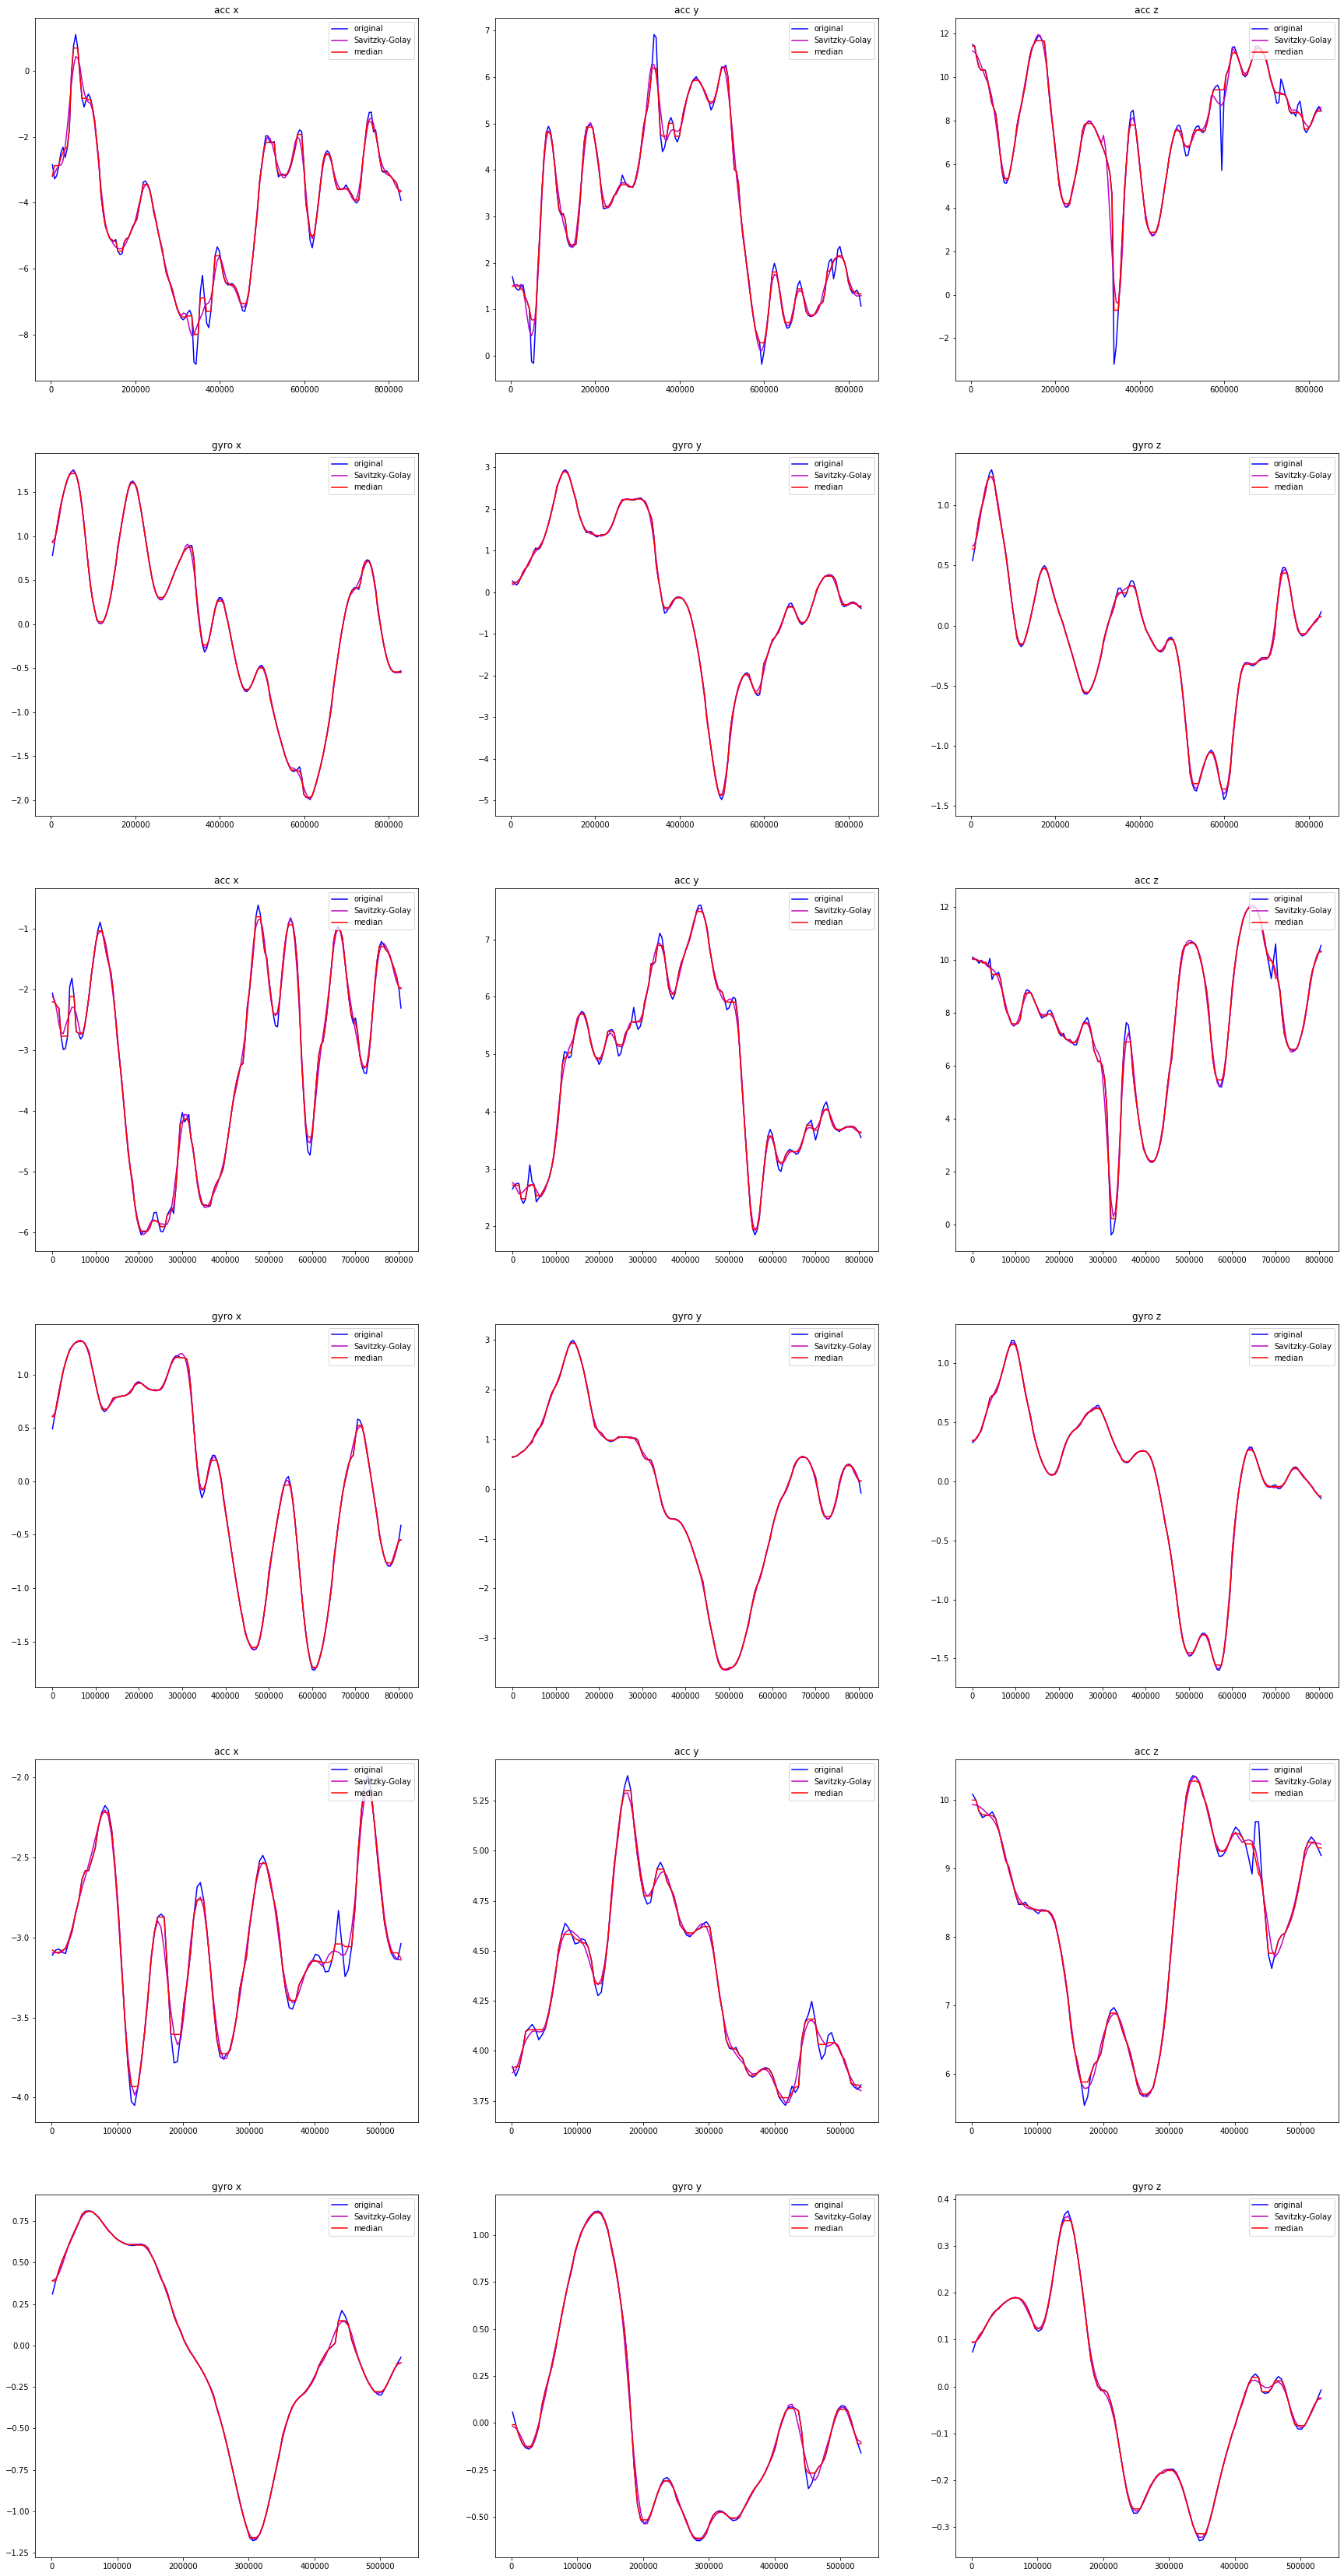

In [63]:
check = np.random.choice(len(tails), size=3, replace=False)
s=1
fig = plt.figure(figsize=(30,60))
for i in enumerate(tails):
    key = pd.read_csv("1dig/key_"+i[1]+".csv")
    acc = pd.read_csv("1dig/acc_"+i[1]+".csv")
    gyro = pd.read_csv("1dig/gyro_"+i[1]+".csv")
    if i[0] in check:
        plt.subplot(6,3,s)
        plt.title("acc x")
        plt.plot(acc["timestamp"], acc["x"], c="b", label = "original")
        filtered = scipy.signal.savgol_filter(acc["x"], window_length = 11, polyorder = 2, mode="mirror")
        plt.plot(acc["timestamp"], filtered, c="m", label = "Savitzky-Golay")
        filtered = ndimage.median_filter(acc["x"],size=5)
        plt.plot(acc["timestamp"], filtered, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+1)
        plt.plot(acc["timestamp"], acc["y"], c="b", label = "original")
        plt.title("acc y")
        filtered = scipy.signal.savgol_filter(acc["y"], window_length = 11, polyorder = 2, mode="mirror")
        plt.plot(acc["timestamp"], filtered, c="m", label = "Savitzky-Golay")
        filtered = ndimage.median_filter(acc["y"],size=5)
        plt.plot(acc["timestamp"], filtered, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+2)
        plt.plot(acc["timestamp"], acc["z"], c="b", label = "original")
        plt.title("acc z")
        filtered = scipy.signal.savgol_filter(acc["z"], window_length = 11, polyorder = 2, mode="mirror")
        plt.plot(acc["timestamp"], filtered, c="m", label = "Savitzky-Golay")
        filtered = ndimage.median_filter(acc["z"],size=5)
        plt.plot(acc["timestamp"], filtered, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+3)
        plt.plot(gyro["timestamp"], gyro["x"], c="b", label = "original")
        plt.title("gyro x")
        filtered = scipy.signal.savgol_filter(gyro["x"], window_length = 11, polyorder = 2, mode="mirror")
        plt.plot(acc["timestamp"], filtered, c="m", label = "Savitzky-Golay")
        filtered = ndimage.median_filter(gyro["x"],size=5)
        plt.plot(acc["timestamp"], filtered, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+4)
        plt.plot(gyro["timestamp"], gyro["y"], c="b", label = "original")
        plt.title("gyro y")
        filtered = scipy.signal.savgol_filter(gyro["y"], window_length = 11, polyorder = 2, mode="mirror")
        plt.plot(acc["timestamp"], filtered, c="m", label = "Savitzky-Golay")
        filtered = ndimage.median_filter(gyro["y"],size=5)
        plt.plot(acc["timestamp"], filtered, c="r", label = "median")
        plt.legend(loc="upper right")
        
        plt.subplot(6,3,s+5)
        plt.plot(gyro["timestamp"], gyro["z"], c="b", label = "original")
        plt.title("gyro z")
        filtered = scipy.signal.savgol_filter(gyro["z"], window_length = 11, polyorder = 2, mode="mirror")
        plt.plot(acc["timestamp"], filtered, c="m", label = "Savitzky-Golay")
        filtered = ndimage.median_filter(gyro["z"],size=5)
        plt.plot(acc["timestamp"], filtered, c="r", label = "median")
        plt.legend(loc="upper right")
        s+=6
check

In [28]:
key

,key,timestamp
0,2,448517


In [29]:
acc

,x,y,z,timestamp
0,-3.775656,2.770091,10.608707,859
1,-3.758897,2.911349,10.637438,5863
2,-4.537012,2.698265,10.936713,10868
3,-4.601655,2.681506,11.044453,15843
4,-4.508282,2.681506,11.109096,20847
...,...,...,...,...
163,-2.767697,3.162740,9.943120,815861
164,-3.071761,3.141193,9.950302,820866
165,-3.363854,3.153164,9.916783,825871
166,-3.517082,3.179500,9.883265,830845


In [30]:
gyro

,x,y,z,timestamp
0,0.211970,0.242514,0.177151,905
1,0.320093,0.177762,0.276722,5929
2,0.436769,0.139888,0.384234,10915
3,0.567494,0.092852,0.549779,15889
4,0.707382,0.070860,0.709825,20894
...,...,...,...,...
163,-0.362243,0.182038,-0.206472,815907
164,-0.294437,0.200364,-0.169210,820912
165,-0.225409,0.183870,-0.114843,825937
166,-0.157603,0.125227,-0.055589,830891


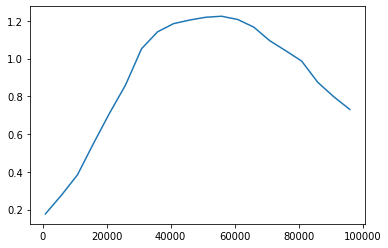

In [37]:
plt.plot(gyro["timestamp"][:20],gyro["z"][:20])